# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [114]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [115]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = numpy.zeros(self.ndim)
        for i in range(len(positions)-1):
            positions[i+1] = positions[i] + walker.pickStep(self)
        return positions

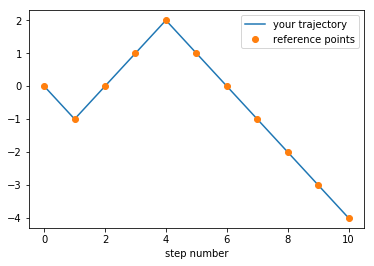

In [116]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

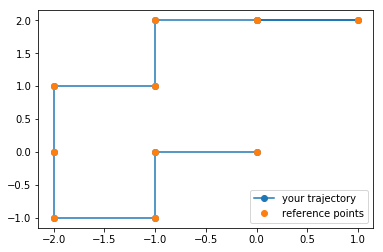

In [117]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

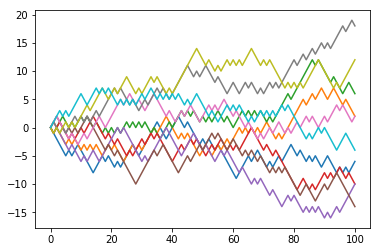

In [118]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


Text(0,0.5,'X')

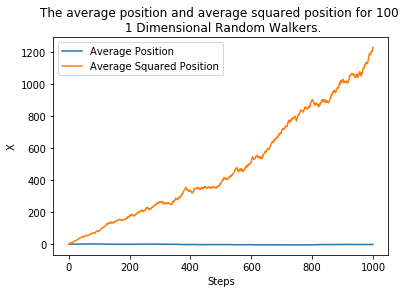

In [119]:
nsteps = 1000
ndim = 1
nwalkers = 100
Dist = numpy.zeros((nsteps, nwalkers))
Distsq = numpy.zeros((nsteps, nwalkers))
average = []
averagesq = []
Steps = numpy.linspace(0,1,1000)*1000

for i in range(0,nwalkers):
    a = walker(ndim).doSteps(nsteps) #1d pos
    for j in range(0,nsteps):
        Dist[j][i] = a[j]
        Distsq[j][i] = a[j]**2
for g in range(0,nsteps):
    average.append(sum(Dist[g]/nwalkers))
    averagesq.append(sum(Distsq[g]/nwalkers))
plt.plot(Steps, average, label='Average Position')
plt.plot(Steps, averagesq, label='Average Squared Position')
plt.legend()
plt.title('The average position and average squared position for 100 \n 1 Dimensional Random Walkers.')
plt.xlabel('Steps')
plt.ylabel('X')

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'This plot shows how the average squared distance walked is independent of the \n number of dimensions along which the walker may move.')

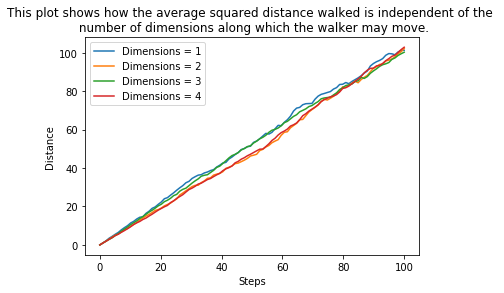

In [120]:
nsteps = 100
steps = numpy.linspace(0,1,100)*100
nwalkers = 400
dimensions = range(1,5)
dimensions1 = numpy.arange(1,6,1)

for i in dimensions: #block to setup the arrays for numerous dimensions
    a = walker(0, ndim=dimensions1[i-1])
    avsq= numpy.zeros(nsteps)
    distsq= numpy.zeros((nsteps,nwalkers))
    zeros = numpy.zeros(i)
    for g in range(0, nwalkers): #per dimension we are now setting up the number of walkers, and their walks
        b = a.doSteps(nsteps)
        for j in range(0, nsteps): 
            for q in range(0,i): #zero array for dimensions = x now gets updated with the distance squared from the walk,
                #                where the walk is nsteps long
                zeros[q] = b[j][q]**2
            distsq[j][g] = sum(zeros) #the distance walked gets updated into an array with each walker being columns
    for y in range(0, nsteps):
        avsq[y] = (sum(distsq[y]/nwalkers))
    plt.plot(steps, avsq, label = 'Dimensions = {}'.format(dimensions[i-1]))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Distance')
plt.title('This plot shows how the average squared distance walked is independent of the \n number of dimensions along which the walker may move.')
#for i in range(0,dimensions):
    

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


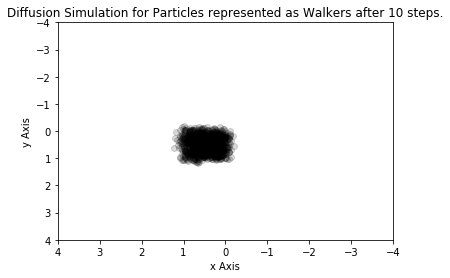

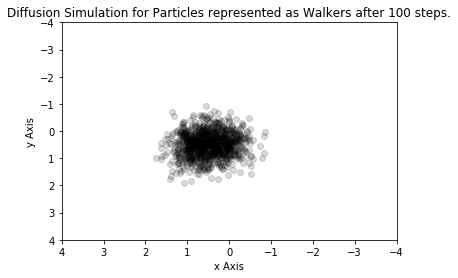

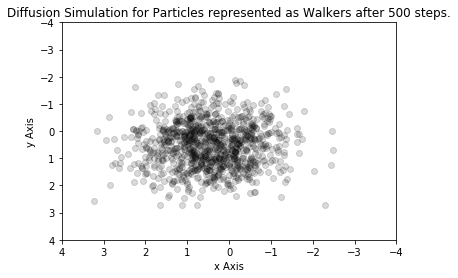

In [166]:
ndim=2
nwalkers=1000
stepSize = 0.05

rand_pos = numpy.random.uniform(size=(1000,2)) #gives initial array of positions

a10 = []
a100 = []
a500 = []

for i in range(0, nwalkers):
    pos = rand_pos[i]
    w = walker(pos, ndim=2, step_size=0.05)
    a10.append(pos+w.doSteps(10)[9])
    (x,y) = a10[i]
    plt.figure(1)
    plt.scatter(x,y, color = 'black', alpha=0.15)
    plt.xlim((4, -4))
    plt.ylim((4, -4))
    plt.xlabel('x Axis')
    plt.ylabel('y Axis')
    plt.title('Diffusion Simulation for Particles represented as Walkers after 10 steps.')

for i in range(0, nwalkers):
    pos = rand_pos[i]
    w = walker(pos, ndim=2, step_size=0.05)
    a100.append(pos+w.doSteps(100)[99])
    (x,y) = a100[i]
    plt.figure(2)
    plt.scatter(x,y, color = 'black', alpha=0.15)
    plt.xlim((4, -4))
    plt.ylim((4, -4))
    plt.xlabel('x Axis')
    plt.ylabel('y Axis')
    plt.title('Diffusion Simulation for Particles represented as Walkers after 100 steps.')
    
for i in range(0, nwalkers):
    pos = rand_pos[i]
    w = walker(pos, ndim=2, step_size=0.05)
    a500.append(pos+w.doSteps(500)[499])
    (x,y) = a500[i]
    plt.figure(3)
    plt.scatter(x,y, color = 'black', alpha=0.15)
    plt.xlim((4, -4))
    plt.ylim((4, -4))
    plt.xlabel('x Axis')
    plt.ylabel('y Axis')
    plt.title('Diffusion Simulation for Particles represented as Walkers after 500 steps.')


#this code is a template to create 3 subplots in one, adapt it to your task!
#plt.figure(figsize=(18,6))
#for i, nsteps in enumerate([10,100,500]):
#    (x,y) = walker(rand_pos, 2, 0.05).doSteps(nsteps)[i]
#    plt.scatter(x,y, color = 'black')
#    plt.subplot(131+i)
#    plt.xlim((-2, 2))
#    plt.ylim((-2, 2))
#    plt.title("plot {} ".format(i+1))    